In [1]:
#T-SNE plotting

In [5]:

from DomAdpQSAR.QSARsettings import Settings
from DomAdpQSAR.QSARsrgan import DomAdpQSARSRGAN

settings = Settings()

import torch
import numpy as np
import pandas as pd
from DomAdpQSAR.utility import MixtureModel, gpu

from scipy.stats import norm

import phate
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
#Load in model
model_name = "SR GAN Ax LLx50 Feat size 32 Ang False Norm feat Norm True"

model_path = "logs/" + model_name + "/"

settings.load_model_path = model_path

SRGAN = DomAdpQSARSRGAN(settings)
SRGAN.dataset_setup()
SRGAN.model_setup()
SRGAN.prepare_optimizers()
SRGAN.load_models()

SRGAN.eval_mode()


dataset rank:  None
7
Model loaded from `logs/SR GAN Ax LLx50 Feat size 32 Ang False Norm feat Norm True/model_1400.pth`.


In [3]:
global_df = pd.read_parquet(model_name+"_global_df.parquet")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


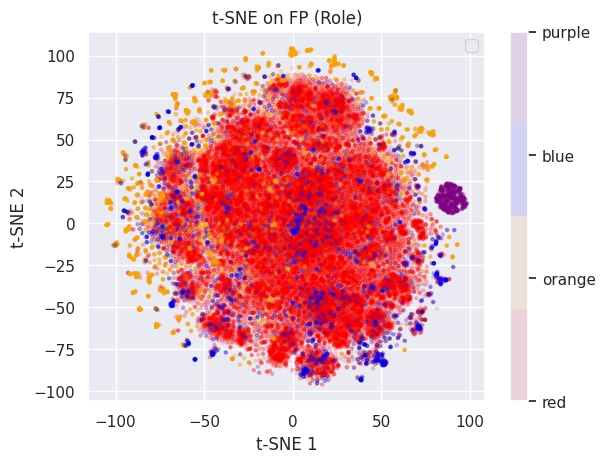

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


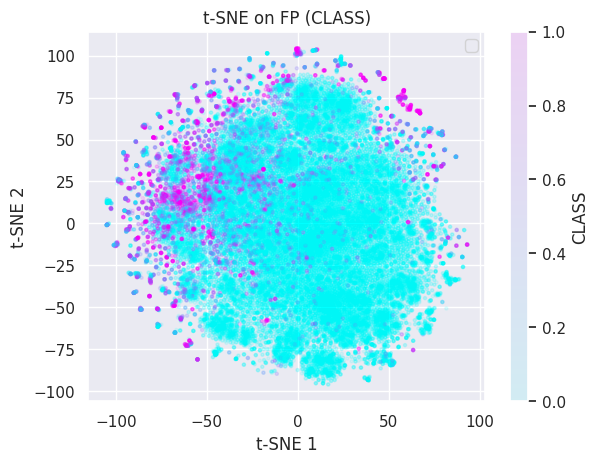

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


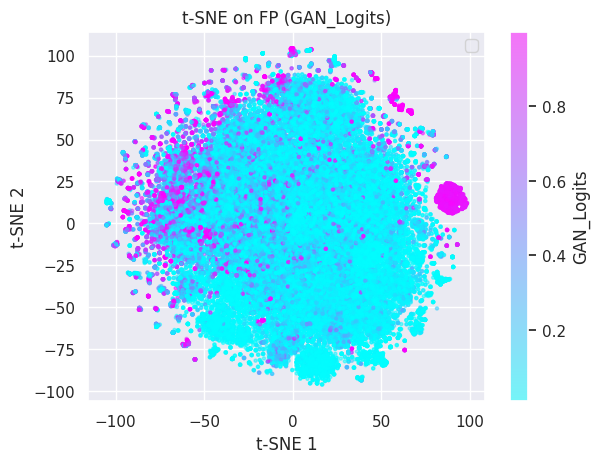

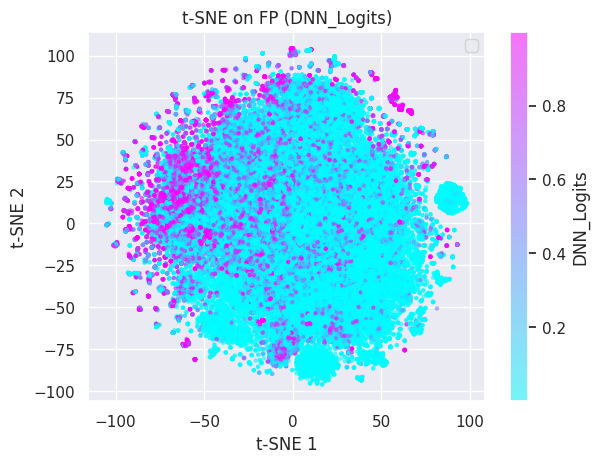

In [26]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE on the GAN features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
data = np.stack(global_df['FP'].to_numpy(), axis=0)

tsne_train = tsne.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=5, alpha=0.1)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on FP (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["CLASS"], cmap='cool', s=5, alpha=0.1)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on FP (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["GAN_Logits"], cmap='cool', s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on FP (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["DNN_Logits"], cmap='cool', s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on FP (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('DNN_Logits')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


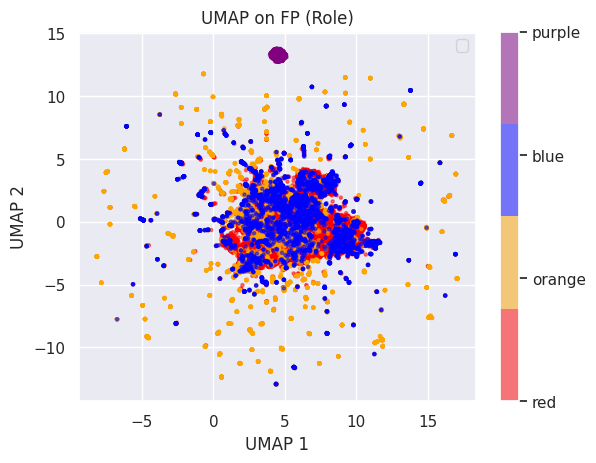

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


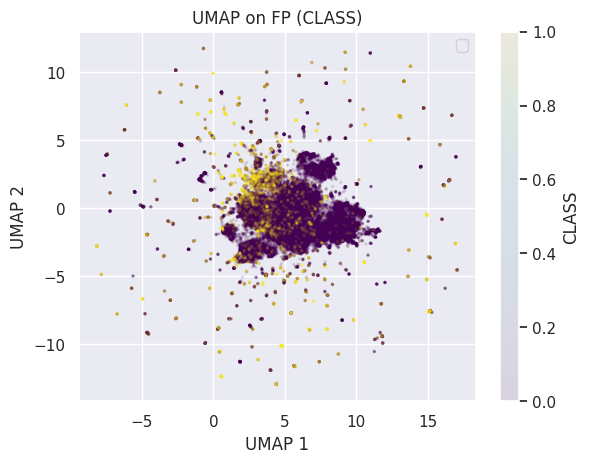

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


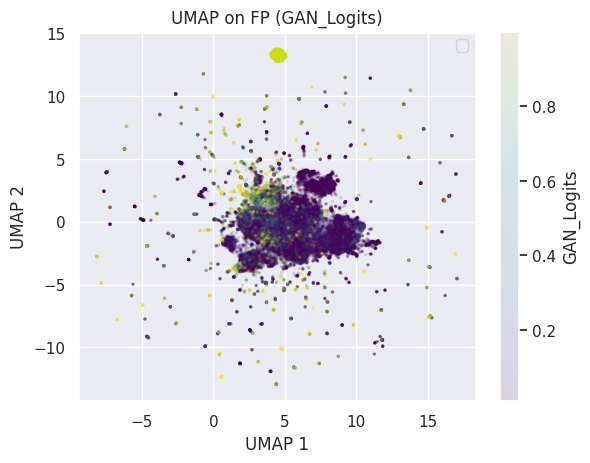

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


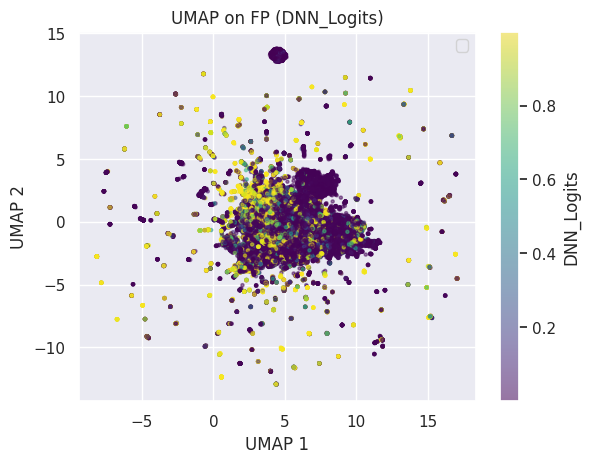

In [17]:
import matplotlib.pyplot as plt
import umap

# Perform UMAP on the GAN features
data = np.stack(global_df['FP'].to_numpy(), axis=0)

umap_embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=5, alpha=0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on FP (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on FP (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["GAN_Logits"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on FP (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()


# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["DNN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on FP (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('DNN_Logits')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


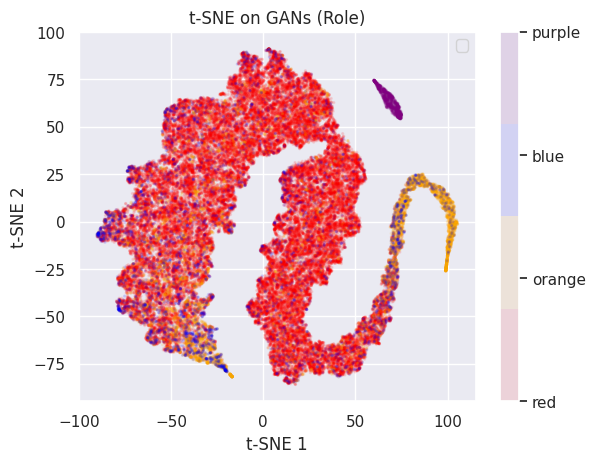

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


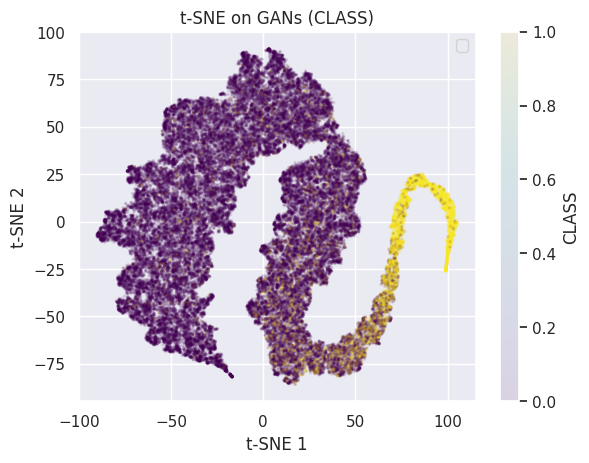

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


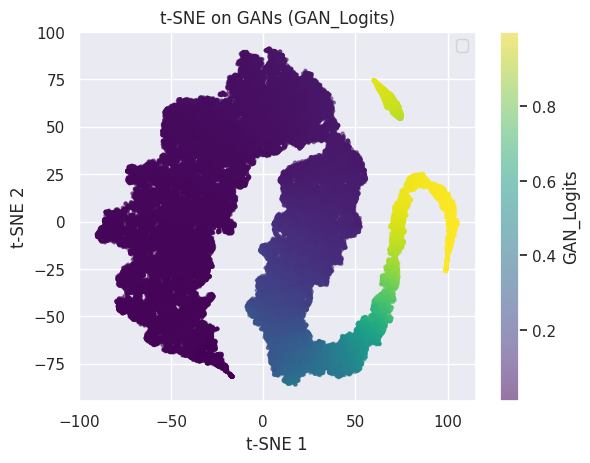

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE on the GAN features
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
data = np.stack(global_df['GAN_Features'].to_numpy(), axis=0)

tsne_train = tsne.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on GANs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on GANs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["GAN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on GANs (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


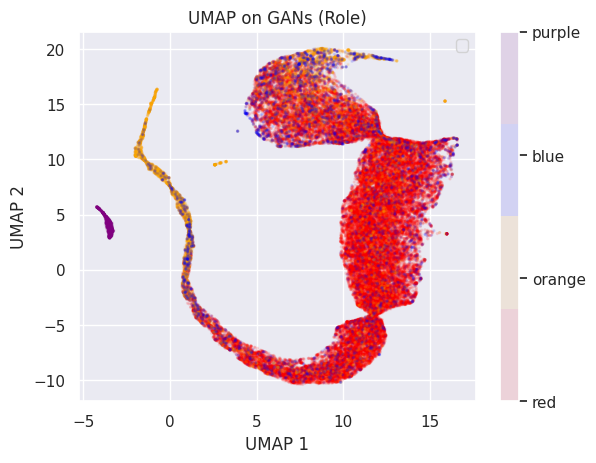

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


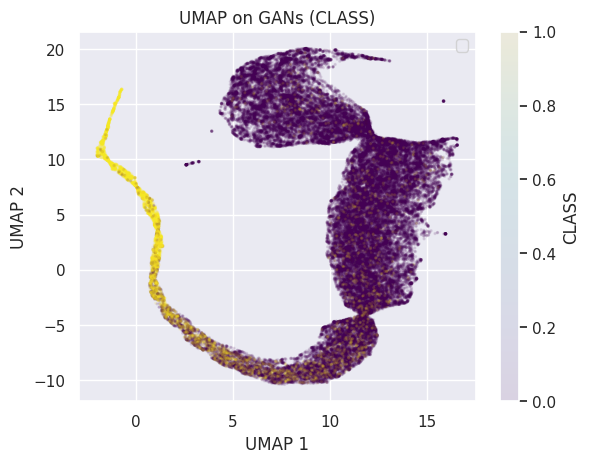

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


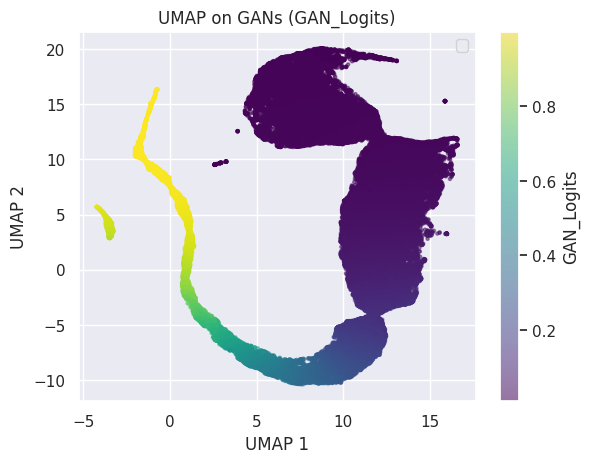

In [21]:
import matplotlib.pyplot as plt
import umap

# Perform UMAP on the GAN features
data = np.stack(global_df['GAN_Features'].to_numpy(), axis=0)

umap_embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on GANs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on GANs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["GAN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on GANs (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


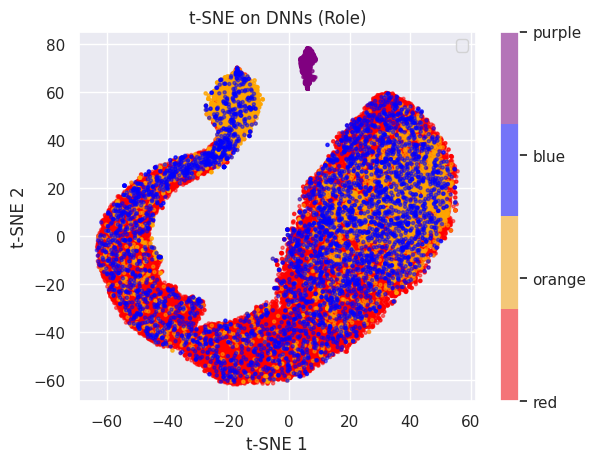

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


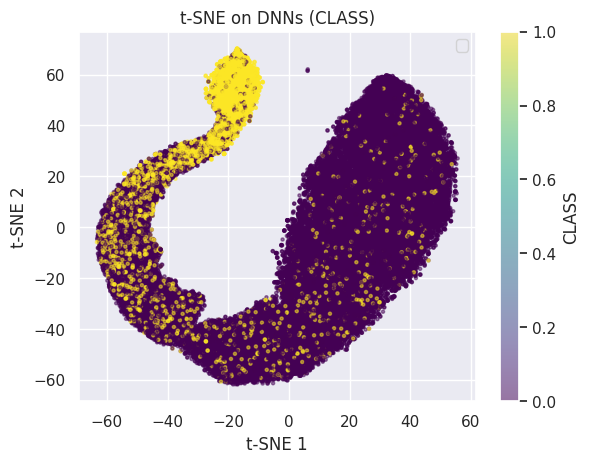

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


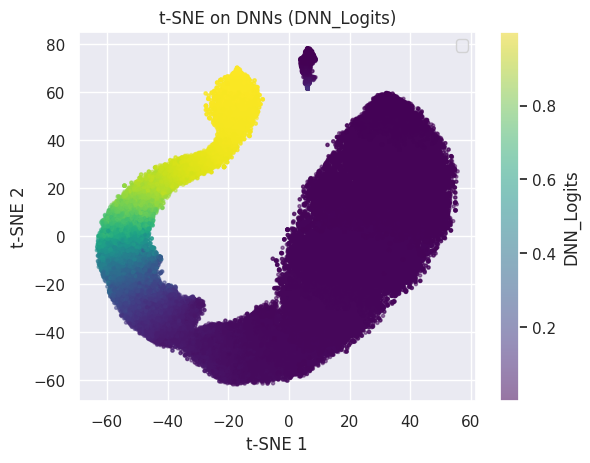

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE on the GAN features
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
data = np.stack(global_df['DNN_Features'].to_numpy(), axis=0)

tsne_train = tsne.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on DNNs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["CLASS"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on DNNs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=global_df["DNN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE on DNNs (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('DNN_Logits')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


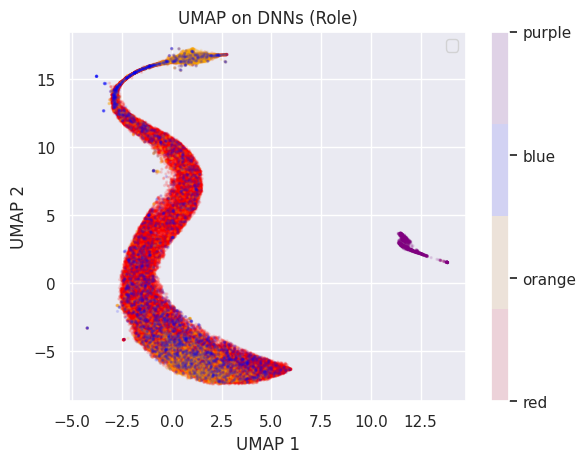

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


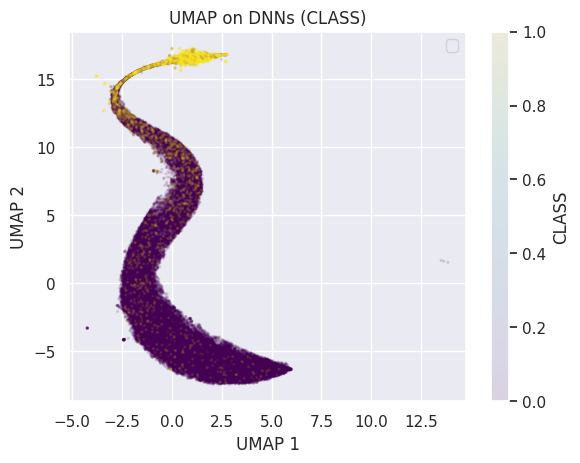

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


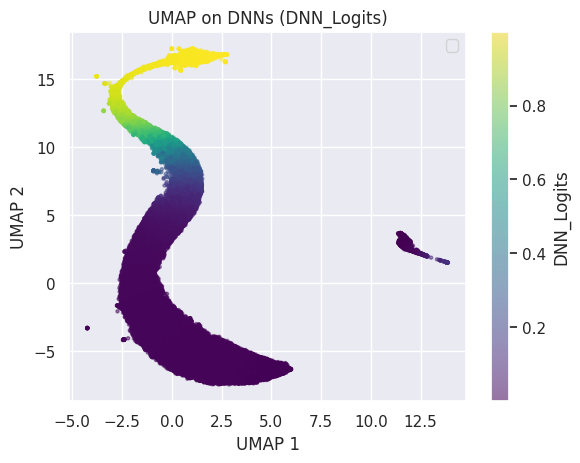

In [19]:
import matplotlib.pyplot as plt
import umap

# Perform UMAP on the GAN features
data = np.stack(global_df['DNN_Features'].to_numpy(), axis=0)

umap_embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on DNNs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on DNNs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=global_df["DNN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_title("UMAP on DNNs (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('DNN_Logits')

plt.show()
